<a href="https://colab.research.google.com/github/signife/VentureStartUp/blob/main/04_23Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from sklearn.datasets import load_boston



In [ ]:
df = pd.read_csv('manhattan.csv')
df

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [ ]:
data = df.iloc[0:,2:16]
data.info()
target = df['rent'] #정답데이터
target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          3539 non-null   float64
 1   bathrooms         3539 non-null   int64  
 2   size_sqft         3539 non-null   int64  
 3   min_to_subway     3539 non-null   int64  
 4   floor             3539 non-null   float64
 5   building_age_yrs  3539 non-null   int64  
 6   no_fee            3539 non-null   int64  
 7   has_roofdeck      3539 non-null   int64  
 8   has_washer_dryer  3539 non-null   int64  
 9   has_doorman       3539 non-null   int64  
 10  has_elevator      3539 non-null   int64  
 11  has_dishwasher    3539 non-null   int64  
 12  has_patio         3539 non-null   int64  
 13  has_gym           3539 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 387.2 KB


0        2550
1       11500
2        4500
3        4795
4       17500
        ...  
3534     4210
3535     6675
3536     1699
3537     3475
3538     4500
Name: rent, Length: 3539, dtype: int64

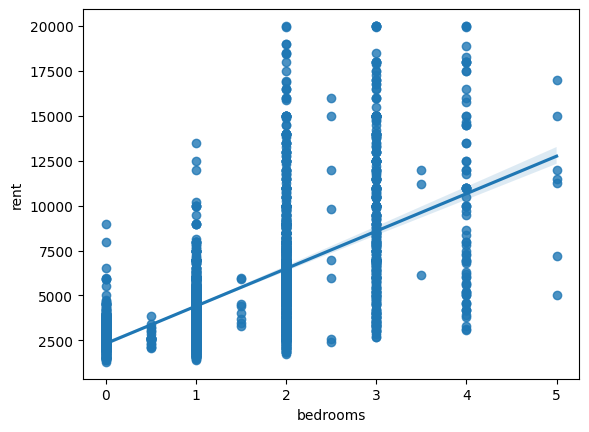

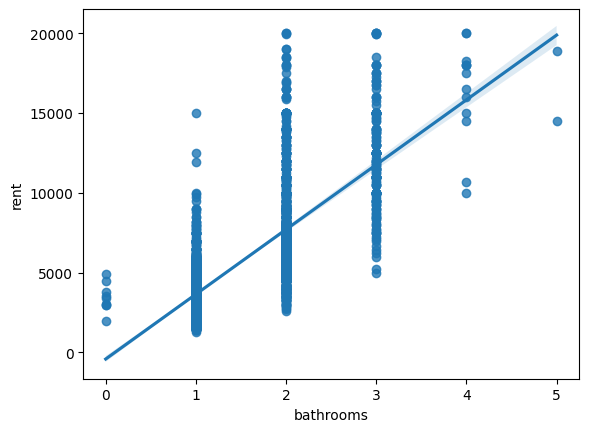

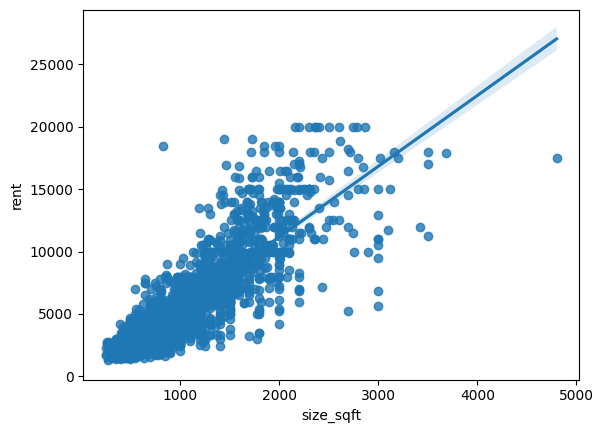

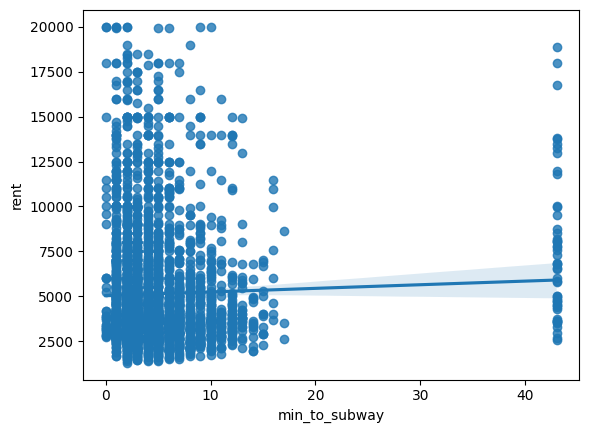

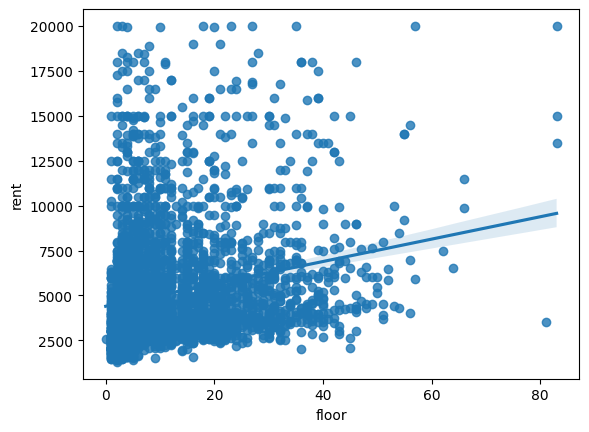

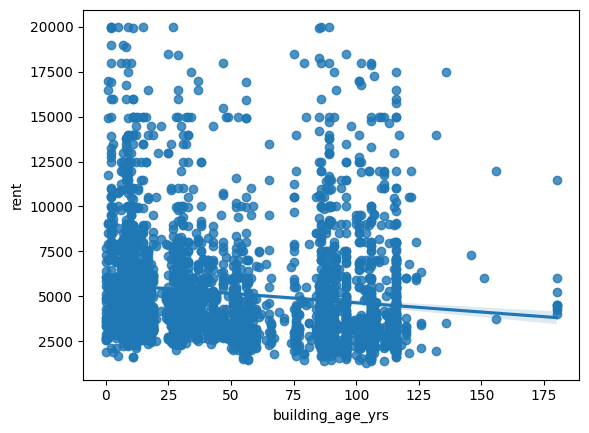

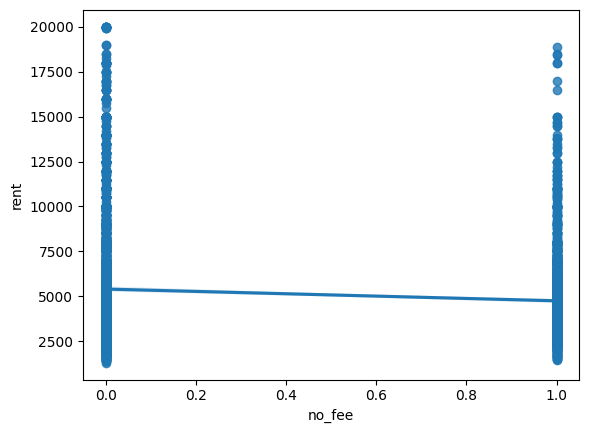

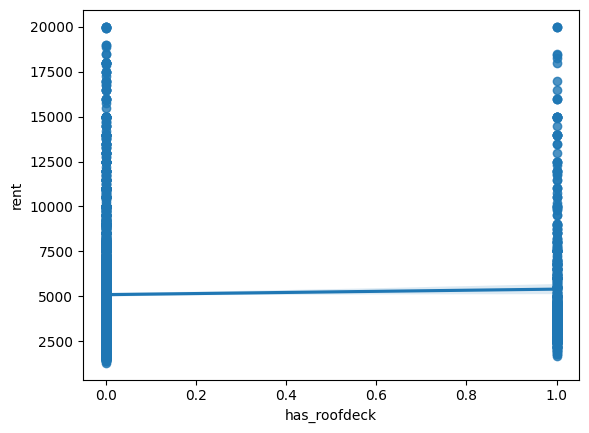

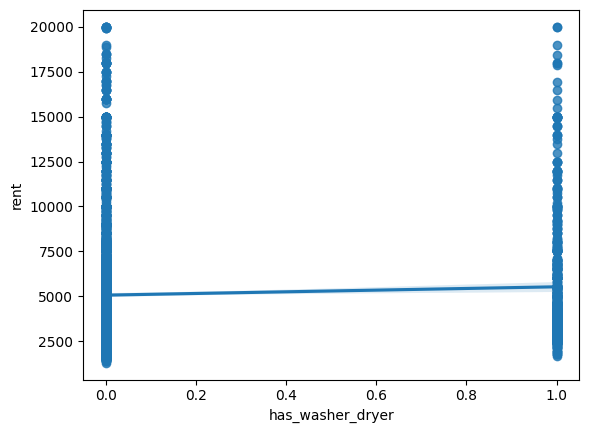

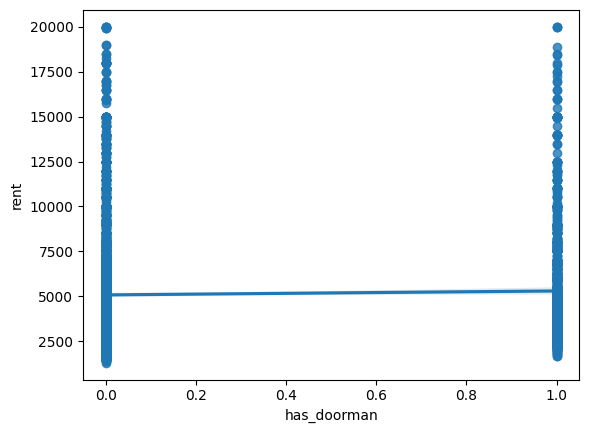

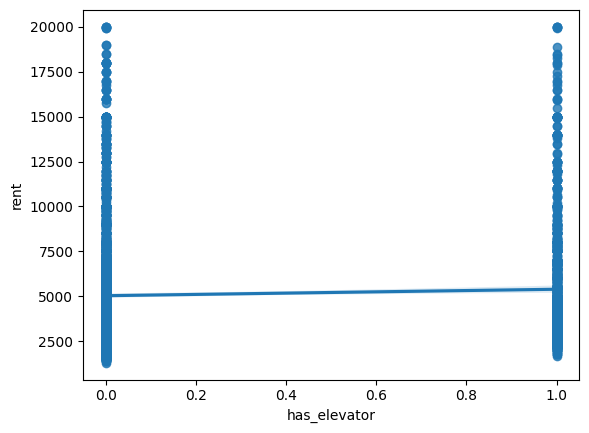

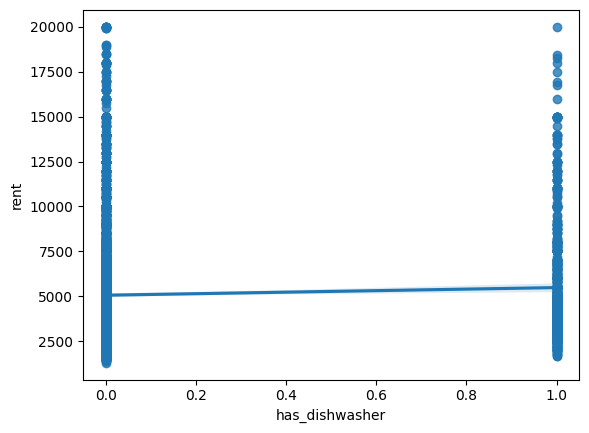

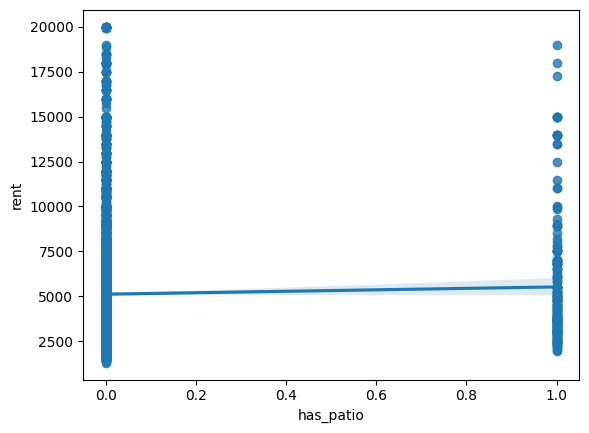

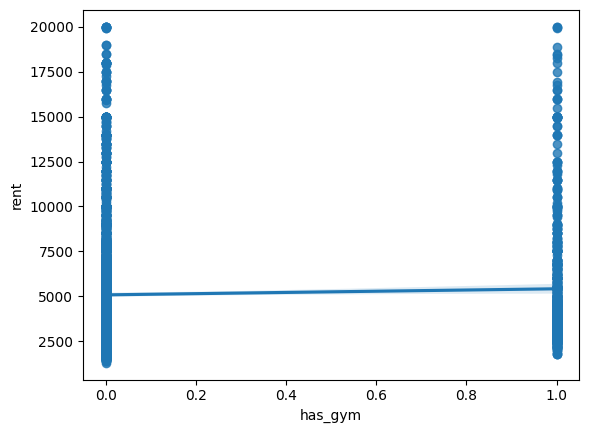

In [ ]:
for temp in data.columns:
    sns.regplot(x = temp, y = target , data=data,)
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, shuffle = True, random_state = 34)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# @title MAE, MSE, RMSE등 R^2값을 이용해야함
predict = model.predict(X_test)

predict

array([ 2501.70110458,  5719.04601073,  5240.08801846,  2975.29674919,
       11653.00423254,  2544.80656208,  4401.26459388,  6908.69361198,
        3471.18979336,  5526.43459695,  6947.13629094, 11252.57643297,
        8682.66205058,  7422.9980151 ,  7637.33353607,  3528.13142806,
        2586.78117873,  5510.59253471,  2358.9525026 ,  4687.022835  ,
        6638.20433059,  6505.7917785 ,  8227.99761159,  9415.16327634,
        3084.18460777,  2883.51037683,  9726.21519597, 10412.1593916 ,
        3069.65179847,  3509.28790136,  7317.98188621,  2894.89532101,
        4160.90066833,  8004.90082162,  4072.24936802,  2894.05802614,
        2187.10788545,  6444.45749249,  6631.76034327,  7008.60474835,
        4333.99789297,  3540.92443289,  3858.56032073, 10355.26753437,
       10486.17914543,  2347.85983087,  3661.31283433,  2880.75670938,
        3688.06494968,  3906.84170114,  2624.66182023,  3245.2382717 ,
       11986.5456934 ,  7687.04444294,  7658.24156329,  2878.42456197,
      

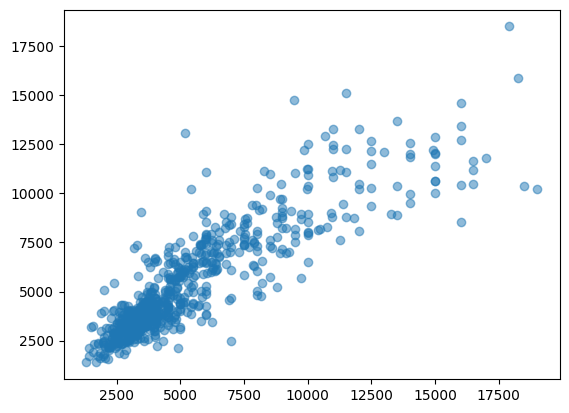

In [ ]:

plt.scatter(y_test,predict,  alpha = 0.5)
plt.show()

In [ ]:
# mse mean squared error
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(predict, y_test)
mse

2322294.4359806594

In [ ]:
rmse = np.sqrt(mse)
rmse #루트 씌운것


1523.9076205533784

In [ ]:
r2_score(predict, y_test) #분산 이용. 1에 가까우면 됨 70%정

0.6949482524004544

In [ ]:
# @title 내가 만든 모델
# from sklearn.preprocessing import MinMaxScaler

# scaler =  MinMaxScaler()
# data_scaled = scaler.fit_transform(data)
# X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size = 0.2, shuffle = True, random_state = 34)


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'fit_intercept': [True, False],
#     'copy_X': [True, False],
#     'n_jobs': [-1, 1]
# }

# grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=7)
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

# best_model = grid_search.best_estimator_
# print("R2 Score:", best_model.score(X_test, y_test))


In [ ]:
predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(predict,y_test)

0.6949482524004544

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0.01,0.05,0.1,0.2,1.0,10.0,100.0,500.0]

ridge = RidgeCV(alphas = alphas, cv = 3)
ridge.fit(X_train,y_train)

RidgeCV(alphas=[0.01, 0.05, 0.1, 0.2, 1.0, 10.0, 100.0, 500.0], cv=3)

In [ ]:
predict = model.predict(X_test)

In [ ]:
r2_score(predict,y_test)

0.6949478890208856

In [ ]:
from sklearn.linear_model import Ridge, Lasso

alpha_list = [0.01,0.05,0.1,0.2,1.0,10.0,100.0,500.0]

for temp in alpha_list:
    print(str(temp))
    model = Ridge(alpha = temp)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    print(r2_score(predict,y_test))

0.01
0.6949478890208856
0.05
0.6949464353336516
0.1
0.6949446178453522
0.2
0.6949409816075562
1.0
0.6949118318816335
10.0
0.6945774242411551
100.0
0.6910903455285557
500.0
0.681133208997007
